In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import pickle

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC

from sklearn.decomposition import PCA, KernelPCA

<h1><center><font size="25"> Regression and Classification on Diamonds </font></center></h1>

<img src="https://media3.giphy.com/media/3oEduUFjTJpjFhVW2Q/giphy.gif?cid=ecf05e474oj2y2qp46pwey07u6gpnkjoeh32tiew312p8od2&rid=giphy.gif" width="400">

## Preparation

DOWNLOAD the random_forest.sav serialized algorithm model from the following link and put it in the data folder:

https://drive.google.com/file/d/1-MdB-sgr-JmGk-anEfZMQtYV6leIIB6W/view?usp=sharing

Its size is 1.465 GB, that's why I uploaded it to Google Drive.

## Abstract
The two main goals of this paper are 
- to find the best regression algorithm for diamand price prediction by the rest of the features in the dataset.  
- to find the best algorithm that classify the color of the diamond by the rest of the features in the dataset.

## Introduction
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

### Features
- Carat : Carat weight of the Diamond.
- Cut : Describe cut quality of the diamond.
    - Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
- Color : Color of the Diamond.
    - With D being the best and J the worst.
- Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
    - (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
- Price : the Price of the Diamond.
- X : Length of the Diamond in mm.
- Y : Width of the Diamond in mm.
- Z : Height of the Diamond in mm.

Qualitative Features (Categorical) : Cut, Color, Clarity.

Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

## Data Exploration

- First we read the diamonds data from diamonds.csv file in the "data" folder

In [2]:
diamonds_data = pd.read_csv("data/diamonds.csv")

In [3]:
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- We check the shape of the data frame

In [4]:
diamonds_data.shape

(53940, 11)

The data frame contains 53940 entries and 11 features

- Lets check column data types

In [5]:
diamonds_data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

- We check for null entries

In [6]:
diamonds_data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

There aren't any null data values

- The first column is not needed in the data analysis, so it will be dropped

In [7]:
diamonds_data = diamonds_data.drop("Unnamed: 0", axis=1)

In [8]:
diamonds_data.sample()

,carat,cut,color,clarity,depth,table,price,x,y,z
29843,0.3,Ideal,D,VS2,62.3,56.0,710,4.29,4.32,2.68


- Now we want to generate descriptive statistics

In [9]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- We see that min "x", "y" and "z" values are zero. This is not possible to have length, width or hight equal to zero.

- Let's filter those values

In [10]:
def has_any_zero_dimention_values(df):
    return (df["x"]==0) | (df["y"]==0) | (df["z"]==0)

In [11]:
diamonds_data_with_zero_in_dimentions = diamonds_data[has_any_zero_dimention_values(diamonds_data)]

In [12]:
diamonds_data_with_zero_in_dimentions

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


- Let's see the length of entries having any zero values in dimentions

In [13]:
len(diamonds_data_with_zero_in_dimentions)

20

- There are only 20 rows with invalid dimention value. 
Having 53940 values in total the best aproach here is to remove these 20 rows. 

In [14]:
diamonds_data = diamonds_data[~has_any_zero_dimention_values(diamonds_data)]

In [15]:
diamonds_data.shape

(53920, 10)

As we expected now we have 53920 entries in the data frame.

## Feature engineering

- Diamond's volume is not part of the data. It's a good idea to calculate it and add it as a new feature. We can calculate it with multiplying length, height and width 

In [16]:
diamonds_data["volume"] = diamonds_data.x * diamonds_data.y * diamonds_data.z

In [17]:
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [18]:
def draw_correlation_heatmap_matrix(dataframe):
    plt.figure(figsize=(16,10))
    sns.heatmap(dataframe.corr(), annot=True, linewidths=1, cmap="ocean_r", fmt=".2f")

    plt.suptitle("Correlation Matrix", fontsize=18)

    plt.show()

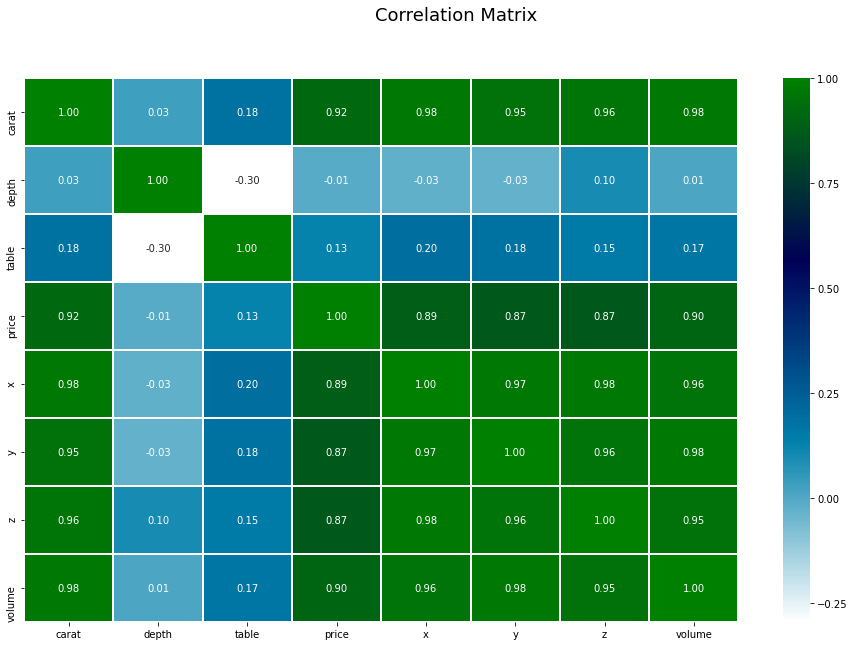

In [19]:
draw_correlation_heatmap_matrix(diamonds_data)

From the Correlation Matrix we can see that the carat and volume features are highly correlated with the price feature.
According to this the algorithms for price prediction should give high r^2.

- Lets check diamonds distribution by color

In [20]:
group_diamonds_by_color = diamonds_data.groupby("color").size().sort_values(ascending=False)

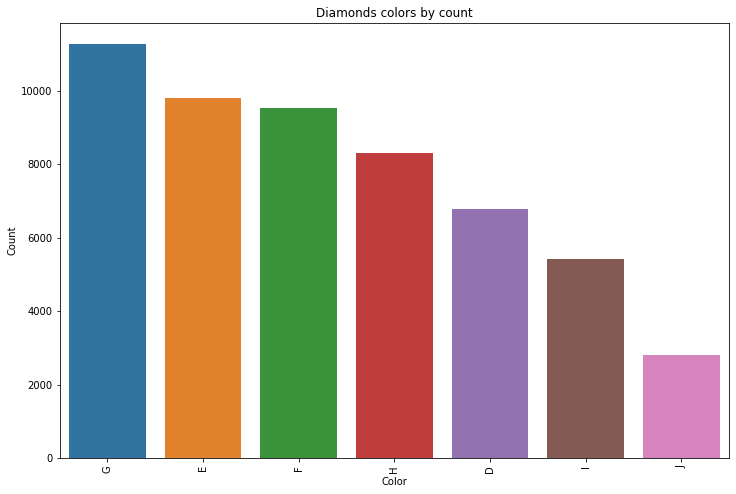

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=group_diamonds_by_color.index, y=group_diamonds_by_color.values)
plt.xticks(rotation=90)
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Diamonds colors by count")
plt.show()

It looks like we don't have equal distribution of the colors

## Predict the diamond price with Regression algorithms

- Prepare attributes and labels sets. The target variable is "price".

In [22]:
diamonds_reg_attributes = diamonds_data.drop("price", axis=1)
diamonds_reg_labels = diamonds_data.price

- Convert categorical variable into dummy/indicator variables

In [23]:
diamonds_reg_attributes = pd.get_dummies(diamonds_reg_attributes)

In [24]:
diamonds_reg_attributes.head()

,carat,depth,table,x,y,z,volume,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,38.202030,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,34.505856,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,38.076885,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,46.724580,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,51.917250,0,1,0,...,0,1,0,0,0,1,0,0,0,0


- Normalize values, scale test and training data

In [25]:
scaler_reg = StandardScaler()
numerical_reg_columns = ["carat", "depth", "table", "x", "y",
       "z", "volume"]
diamonds_reg_attributes[numerical_reg_columns] = scaler_reg.fit_transform(diamonds_reg_attributes[numerical_reg_columns])

In [26]:
diamonds_reg_attributes.head()

,carat,depth,table,x,y,z,volume,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,-1.172291,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,-1.219546,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,-1.173891,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,-1.063334,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,-0.996948,0,1,0,...,0,1,0,0,0,1,0,0,0,0


- Prepare training and testing sets

In [27]:
diamonds_reg_attributes_train, diamonds_reg_attributes_test, diamonds_reg_labels_train, diamonds_reg_labels_test = (
    train_test_split(diamonds_reg_attributes, diamonds_reg_labels, train_size = 0.90, test_size = 0.10))

### We will use library "pickle" in order to save our trained models. If we don't save them we will need to train them with each run of the notebook, which takes a lot of time.

- Defining two helper methods will help us to do read and save operations in cleaner way  

In [28]:
def read_model(file_name):
    try:
        with open(file_name, "rb") as read_stream:
            return pickle.load(read_stream)
    except:
        return None

In [29]:
def save_model(file_name, algorithm_model):    
    with open(file_name, "wb") as write_stream:
        pickle.dump(algorithm_model, write_stream)

- Lets perform Linear Regression 

In [30]:
linear_regression_file_name = "data/linear_regression.sav"
linear_regression = read_model(linear_regression_file_name)
if linear_regression is None:
    linear_regression = LinearRegression()
    linear_regression.fit(diamonds_reg_attributes_train, diamonds_reg_labels_train)
    
    save_model(linear_regression_file_name, linear_regression)

- Lets perform Random Forest Regression

In [31]:
random_forest_reg_file_name = "data/random_forest_reg.sav"
random_forest_reg = read_model(random_forest_reg_file_name)
if random_forest_reg is None:
    rfr_grid_params = {
        "max_depth": [1, 50, 100, 500, 1000], 
        "min_samples_leaf": [2, 5, 10, 12],
        "max_leaf_nodes": [5, 10, 20]
    }
    random_forest_reg = RandomForestRegressor()
    ran_search_rfr = RandomizedSearchCV(random_forest_reg, rfr_grid_params, scoring = "r2")
    ran_search_rfr.fit(diamonds_reg_attributes_train, diamonds_reg_labels_train)
    random_forest_reg = ran_search_rfr.best_estimator_
    
    save_model(random_forest_reg_file_name, random_forest_reg)

In [32]:
random_forest_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1000,
                      max_features='auto', max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

The optimal RandomForestRegressor parameters are max_depth=1000, min_samples_leaf=10 and max_leaf_nodes=20

- Lets perform K-Nearest Neighbors Regression

In [33]:
k_neighbors_file_name = "data/k_neighbors.sav"
k_neighbors = read_model(k_neighbors_file_name)
if k_neighbors is None:
    kn_grid_params = {
        "n_neighbors": [3, 5, 10, 20]
    }
    k_neighbors = KNeighborsRegressor()
    ran_search_kn = RandomizedSearchCV(k_neighbors, kn_grid_params, scoring = "r2")
    ran_search_kn.fit(diamonds_reg_attributes_train, diamonds_reg_labels_train)
    k_neighbors = ran_search_kn.best_estimator_
    
    save_model(k_neighbors_file_name, k_neighbors)

In [34]:
k_neighbors

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

The optimal KNeighborsRegressor n_neighbors parameter for this dataset is 5

### Visualizing R2-Score of Algorithms

In [35]:
def r2_score_for_multiple_algorithms(algorithms):
    r2s = []
    for algorithm in algorithms:
        r2 = r2_score(diamonds_reg_labels_test, algorithm.predict(diamonds_reg_attributes_test))
        r2s.append(r2)
    
    return r2s

In [36]:
reg_algorithms_names = [ "Linear Regression", "Random Forest Regression", "K-Nearest Neighbors Regression"]
r2_scores = r2_score_for_multiple_algorithms([linear_regression, random_forest_reg, k_neighbors])

In [37]:
compare = pd.DataFrame({"Algorithms" : reg_algorithms_names , "R2-Scores" : r2_scores})
compare.sort_values(by="R2-Scores" ,ascending=False)

,Algorithms,R2-Scores
2,K-Nearest Neighbors Regression,0.973511
1,Random Forest Regression,0.935627
0,Linear Regression,0.914240


- The K-Nearest Neighbors Regression gives us the best R^2 score on the testing dataset - 0.973511

## Classify the diamond color with Classification algorithms

- Prepare attributes and labels sets. The target variable is "color".

In [38]:
diamonds_cl_attributes = diamonds_data.drop("color", axis=1)
diamonds_cl_labels = diamonds_data.color

- Convert categorical variable into dummy/indicator variables

In [39]:
diamonds_cl_attributes = pd.get_dummies(diamonds_cl_attributes)

In [40]:
diamonds_cl_attributes.head()

,carat,depth,table,price,x,y,z,volume,cut_Fair,cut_Good,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,0,1,...,0,0,0,0,0,1,0,0,0,0


- Normalize values, scale test and training data

In [41]:
scaler_cl = StandardScaler()
numerical_cl_columns = ["carat", "depth", "table", "x", "y",
       "z", "volume", "price"]
diamonds_cl_attributes[numerical_cl_columns] = scaler_cl.fit_transform(diamonds_cl_attributes[numerical_cl_columns])

In [42]:
diamonds_cl_attributes.head()

,carat,depth,table,price,x,y,z,volume,cut_Fair,cut_Good,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,-1.172291,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,-1.219546,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,-1.173891,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,-1.063334,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,-0.996948,0,1,...,0,0,0,0,0,1,0,0,0,0


- Using PCA to Transforms all variables so they are linearly independent

In [43]:
pca = PCA()
pca.fit(diamonds_cl_attributes)
diamonds_cl_attributes_pca = pca.transform(diamonds_cl_attributes)

In [44]:
pca.explained_variance_ratio_

array([6.04785979e-01, 1.40507350e-01, 8.18649068e-02, 2.56907563e-02,
       2.42779946e-02, 2.17272258e-02, 2.13023190e-02, 1.95831628e-02,
       1.41459455e-02, 1.00691281e-02, 9.31052954e-03, 7.19474492e-03,
       5.65542119e-03, 3.83576478e-03, 3.59423023e-03, 2.91607913e-03,
       2.16244208e-03, 1.22060400e-03, 1.55416303e-04, 2.54932250e-33,
       3.36799354e-34])

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60478598, 0.74529333, 0.82715824, 0.85284899, 0.87712699,
       0.89885421, 0.92015653, 0.93973969, 0.95388564, 0.96395477,
       0.9732653 , 0.98046004, 0.98611546, 0.98995123, 0.99354546,
       0.99646154, 0.99862398, 0.99984458, 1.        , 1.        ,
       1.        ])

- The last two features brings barely any value, so we will remove them

In [46]:
diamonds_cl_attributes_pca.shape

(53920, 21)

In [47]:
diamonds_cl_attributes_pca = diamonds_cl_attributes_pca[:,:19]

In [48]:
diamonds_cl_attributes_pca.shape

(53920, 19)

- Lets take the first two principal components and visalize their dependency for all points per color category

In [49]:
first_pc, second_pc = diamonds_cl_attributes_pca[:, 0], diamonds_cl_attributes_pca[:, 1]
color_labels = LabelEncoder().fit_transform(diamonds_cl_labels)

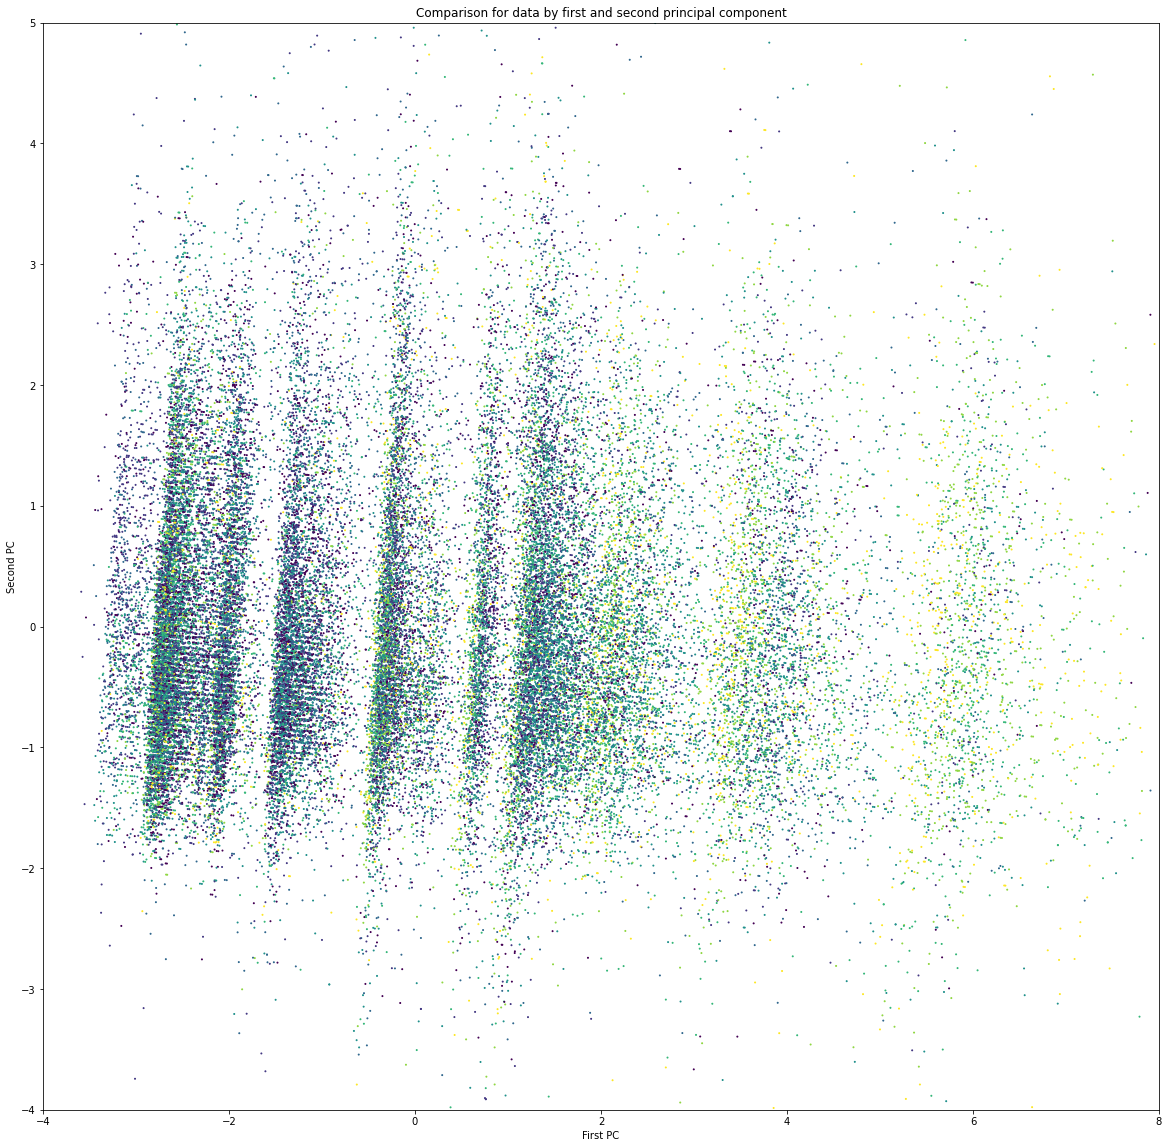

In [50]:
plt.figure(figsize = (20, 20))
plt.scatter(first_pc, second_pc, c = color_labels, s = 1)
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.title("Comparison for data by first and second principal component")
plt.ylim(-4, 5)
plt.xlim(-4,8)
plt.show()

According to this graph there isn't a good separation between the clases. So we don't expect good result from the classification agorithms 

- Prepare training and testing sets

In [51]:
diamonds_cl_attributes_train, diamonds_cl_attributes_test, diamonds_cl_labels_train, diamonds_cl_labels_test = (
    train_test_split(diamonds_cl_attributes_pca, diamonds_cl_labels, train_size = 0.90, test_size = 0.10, stratify = diamonds_cl_labels))

- Prepare cross-validation folds

In [52]:
k_fold = StratifiedKFold(n_splits=5)

- Train logistic regression model

In [53]:
logistic_regression_file_name = "data/logistic_regression.sav"
logistic_regression = read_model(logistic_regression_file_name)
if logistic_regression is None:
    lr_grid_params = {
        "C": [1e-4, 1e-2, 1e0, 1e2, 1e4],
        "max_iter": [50, 100, 300, 1000],
        "fit_intercept": [True, False]
    }
    logistic_regression = LogisticRegression()
    grid_search_lr = GridSearchCV(logistic_regression, lr_grid_params, scoring = "f1_micro", cv = k_fold)
    grid_search_lr.fit(diamonds_cl_attributes_train, diamonds_cl_labels_train)
    logistic_regression = grid_search_lr.best_estimator_
    
    save_model(logistic_regression_file_name, logistic_regression)


In [54]:
logistic_regression

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The optimal parameters for the LogisticRegression are C=10000.0, max_iter=50 and fit_intercept=True

- Train decesion tree model

In [55]:
decision_tree_file_name = "data/decision_tree.sav"
decision_tree = read_model(decision_tree_file_name)
if decision_tree is None:
    dt_grid_params = {
        "max_depth": [1, 50, 100, 500, 1000], 
        "min_samples_leaf": [2, 5, 10, 12],
        "max_leaf_nodes": [5, 10, 20]
    }
    decision_tree = DecisionTreeClassifier()
    ran_search_dt = RandomizedSearchCV(decision_tree, dt_grid_params, scoring = "f1_micro", cv = k_fold)
    ran_search_dt.fit(diamonds_cl_attributes_train, diamonds_cl_labels_train)
    decision_tree = ran_search_dt.best_estimator_
    
    save_model(decision_tree_file_name, decision_tree)

In [56]:
decision_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The optimal decesion tree model is with parameters: max_depth=500, min_samples_leaf=5 and max_leaf_nodes=20

- Train random forest model

In [57]:
random_forest_file_name = "data/random_forest.sav"
random_forest = read_model(random_forest_file_name)
if random_forest is None:
    rf_grid_params = {
        "n_estimators": [50, 250, 500],
        "max_depth": [50, 500, 1000]
    }
    random_forest = RandomForestClassifier()
    ran_search_rf = RandomizedSearchCV(random_forest, rf_grid_params, scoring = "f1_micro", cv = k_fold)
    ran_search_rf.fit(diamonds_cl_attributes_train, diamonds_cl_labels_train)
    random_forest = ran_search_rf.best_estimator_
    
    save_model(random_forest_file_name, random_forest)

In [58]:
random_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The optimal decesion tree model is with parameters: n_estimators=500 and max_depth=50

- Train gaussian svm model

In [59]:
gaussian_svm_file_name = "data/gaussian_svm.sav"
gaussian_svm = read_model(gaussian_svm_file_name)
if gaussian_svm is None:
    g_svm_grid_params = {
        "C": [1e-4, 1e-2, 1e0, 1e2, 1e4],
        "gamma": [1e-4, 1e-2, 1e-1, 0.2]
    }
    gaussian_svm = SVC(kernel="rbf")
    ran_search_gsvm = RandomizedSearchCV(gaussian_svm, g_svm_grid_params, scoring = "f1_macro", cv = k_fold)
    ran_search_gsvm.fit(diamonds_cl_attributes_train, diamonds_cl_labels_train)
    gaussian_svm = ran_search_gsvm.best_estimator_
    
    save_model(gaussian_svm_file_name, gaussian_svm)

In [60]:
gaussian_svm

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
accuracy_score(diamonds_cl_labels_test, gaussian_svm.predict(diamonds_cl_attributes_test))

0.6934347181008902

In [62]:
f1_score(diamonds_cl_labels_test, gaussian_svm.predict(diamonds_cl_attributes_test), average="macro")

0.7203889761450115

### Classification algorithms comparison

- Let's score the classification algorithms predictions

In [63]:
def accuracy_score_for_multiple_algorithms(algorithms):
    accuracies = []
    for algorithm in algorithms:
        acc = accuracy_score(diamonds_cl_labels_test, algorithm.predict(diamonds_cl_attributes_test))
        accuracies.append(acc)
    
    return accuracies

In [64]:
def f1_score_for_multiple_algorithms(algorithms, average="macro"):
    accuracies = []
    for algorithm in algorithms:
        f1 = f1_score(diamonds_cl_labels_test, algorithm.predict(diamonds_cl_attributes_test), average=average)
        accuracies.append(f1)
    
    return accuracies

In [65]:
cl_algorithms_names = [ "Logistic Regression", "Decesion tree", "Random forest", "Gaussian SVM"]
cl_algorithms = [logistic_regression, decision_tree, random_forest, gaussian_svm]
accuracy_scores = accuracy_score_for_multiple_algorithms(cl_algorithms)
f1_scores = f1_score_for_multiple_algorithms(cl_algorithms)

C:\Users\georgi4c\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
compare_cl = pd.DataFrame({"Algorithms" : cl_algorithms_names , "Accuracy Scores" : accuracy_scores, "F1-Scores" : f1_scores})
compare_cl.sort_values(by="F1-Scores" ,ascending=False)

,Algorithms,Accuracy Scores,F1-Scores
2,Random forest,0.953450,0.955565
3,Gaussian SVM,0.693435,0.720389
1,Decesion tree,0.323813,0.308530
0,Logistic Regression,0.304340,0.278260


- Random forest gives too good score and it's possible to have overfitting there. It has 0.955565 f1 score
- On seconds place is the Gaussian SVM with 0.720389 f1 score

## Conclusion

- Predict the diamond price with Regression algorithms
    - The K-Nearest Neighbors Regression gives us the best R^2 score for price prediction on the testing dataset - 0.973511

- Classify the diamond color with Classification algorithms
    - Random forest gives too good score and it's possible to have overfitting there. It has 0.955565 f1 score
    - On seconds place is the Gaussian SVM with 0.720389 f1 score
    - As a whole it looks like it's hard to predict diamond colors from the rest of the features 

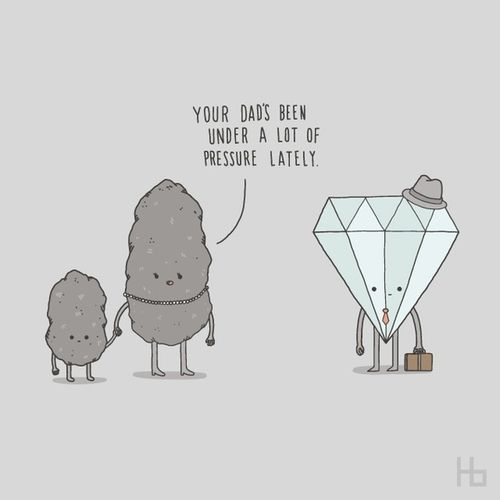

## References
[1] https://www.kaggle.com/shivam2503/diamonds

[2] https://www.kaggle.com/fuzzywizard/diamonds-in-depth-analysis

[3] https://www.kaggle.com/shrutimechlearn/types-of-regression-and-stats-in-depth